In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial.distance as dist
import pickle

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

import flock
import boids
import qlearner as ql

%matplotlib inline

In [479]:
qlearner, Q_avg = ql.QLearner.load()

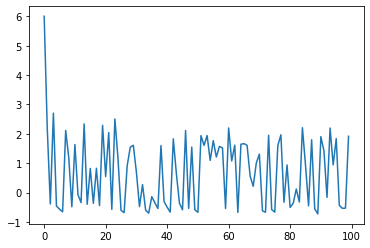

In [480]:
plt.plot(qlearner.cost_episodes)

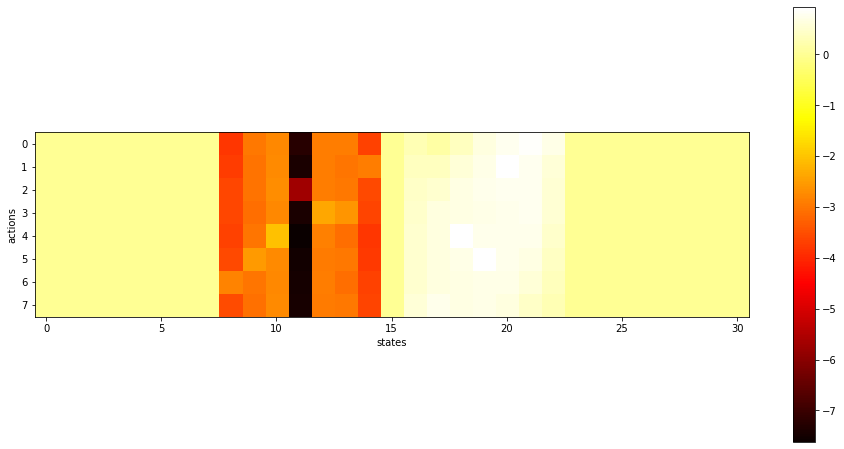

In [481]:
fig, ax = plt.subplots(figsize=(16,8))
img = ax.imshow(Q_avg[:-1,:].T, cmap='hot', interpolation='nearest')
ax.set_xlabel('states')
ax.set_ylabel('actions')
fig.colorbar(img)

In [524]:
flock_params = {
    'n_birds':200,
    'speed':0.5,
    'time_step':1,
    'birth_box':(-7,7),
    'bounding_box':(-20,20),
    'random_seed':0
}
flck = flock.Flock(**flock_params)

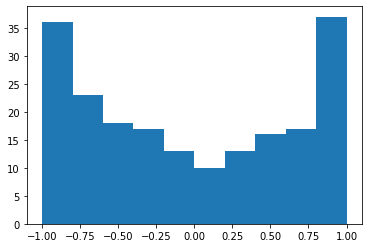

In [525]:
state, cohesion, alignment, n_neighbors = flck.get_state()
r = flck.get_reward(cohesion, n_neighbors)
plt.hist(alignment);

0.21559725378557787


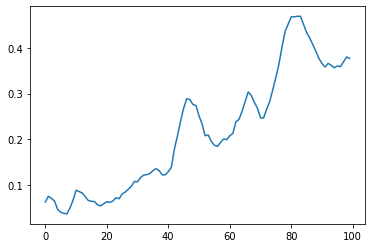

In [526]:
episode_len=100
output = qlearner.run_episode(flck, episode_len=episode_len, save_trajectories=True, learn=False)

dir_x, dir_y = output[4], output[5]

vdir = np.array((dir_x.sum(axis=1), dir_y.sum(axis=1)))
polar_order = np.linalg.norm(vdir, axis=0)/dir_x.shape[1]
plt.plot(polar_order)
print(polar_order.mean())

i = 0
flck.get_neighbors()

print(flck.position[i,:])
print(flck.direction[i,:])
print()


#for i in range(self.n_birds):
nbrs = flck.neighbors_in_range[i]
n_neighbors = nbrs.shape[0]
print(nbrs)

avg_direction = flck.direction[nbrs,:].mean(axis=0)
avg_direction = avg_direction/np.linalg.norm(avg_direction)
print(avg_direction)

test_direction = [-flck.direction[i,1], flck.direction[i,0]]
test_sign = 1 if np.dot(avg_direction, test_direction)>=0 else -1

state = test_sign*(np.dot(avg_direction, flck.direction[i,:]))
print(state)

plt.quiver(flck.position[nbrs,0], flck.position[nbrs,1], flck.direction[nbrs,0], flck.direction[nbrs,1])
plt.quiver(flck.position[i,0], flck.position[i,1], flck.direction[i,0], flck.direction[i,1])

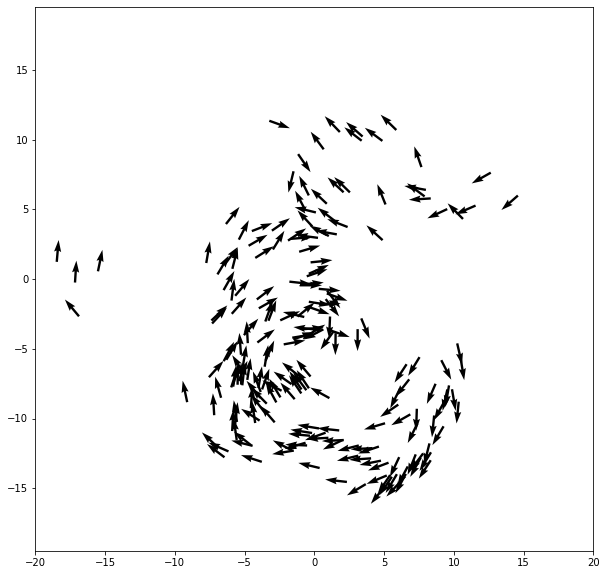

In [515]:
traj_x, traj_y = output[2], output[3]
dir_x, dir_y = output[4], output[5]

xdata, ydata = traj_x[0,:], traj_y[0,:]
udata, vdata = dir_x[0,:], dir_y[0,:]

fig, ax = plt.subplots(figsize=(10,10))
ax.axis('equal')
ax.set_xlim(flock_params['bounding_box'])
ax.set_ylim(flock_params['bounding_box'])
pc = plt.quiver(xdata, ydata, udata, vdata)

def update(frame):
    xdata, ydata = traj_x[frame,:], traj_y[frame,:]
    udata, vdata = dir_x[frame,:], dir_y[frame, :]
    pc.set_offsets(np.c_[xdata,ydata])
    pc.set_UVC(udata, vdata)
    return pc,

ani = FuncAnimation(fig, update, frames=episode_len, blit=True)
HTML(ani.to_jshtml())

In [501]:
from matplotlib.animation import PillowWriter

In [503]:
ani.save('flocking.gif', writer=PillowWriter())

---

In [ ]:
alpha = 0.005
n_states = 128
n_actions = flock.Flock.num_turns
tol = 1e-8
eps = 0.05

flck = flock.Flock(**flock_params)

qlearner_new = ql.QLearner(alpha, n_states, n_actions, flock_params['n_birds'], eps, tol)
output_baseline = qlearner_new.run_episode(flck, 500, save_trajectories=True, learn=False)

dir_x, dir_y = output_baseline[4], output_baseline[5]

vdir = np.array((dir_x.sum(axis=1), dir_y.sum(axis=1)))
polar_order = np.linalg.norm(vdir, axis=0)/dir_x.shape[1]
print(polar_order.mean())